# QWE Case Study on Customer Churn Analysis



In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from datetime import datetime
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier

In [22]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA815/'
df = pd.read_excel(data_folder+'UV6696-XLS-ENG.xlsx', sheet_name='Case Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [23]:
df.head()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          6347 non-null   int64  
 1   Customer Age (in months)    6347 non-null   int64  
 2   Churn (1 = Yes, 0 = No)     6347 non-null   int64  
 3   CHI Score Month 0           6347 non-null   int64  
 4   CHI Score 0-1               6347 non-null   int64  
 5   Support Cases Month 0       6347 non-null   int64  
 6   Support Cases 0-1           6347 non-null   int64  
 7   SP Month 0                  6347 non-null   float64
 8   SP 0-1                      6347 non-null   float64
 9   Logins 0-1                  6347 non-null   int64  
 10  Blog Articles 0-1           6347 non-null   int64  
 11  Views 0-1                   6347 non-null   int64  
 12   Days Since Last Login 0-1  6347 non-null   int64  
dtypes: float64(2), int64(11)
memory u

In [25]:
#hecking for null values
df.isnull().sum()

ID                            0
Customer Age (in months)      0
Churn (1 = Yes, 0 = No)       0
CHI Score Month 0             0
CHI Score 0-1                 0
Support Cases Month 0         0
Support Cases 0-1             0
SP Month 0                    0
SP 0-1                        0
Logins 0-1                    0
Blog Articles 0-1             0
Views 0-1                     0
 Days Since Last Login 0-1    0
dtype: int64

In [26]:
# Replace column names in the dataset
df.rename(columns={
    'Customer Age (in months)': 'Customer Age',
    'Churn (1 = Yes, 0 = No)': 'Churn'
}, inplace=True)

In [97]:
# Create a pivot table
pivot_table = df.pivot_table(index='Churn', values='ID', aggfunc='count')

# Rename the columns for better clarity
pivot_table.columns = ['Count']

# Display the pivot table
print(pivot_table)

       Count
Churn       
0       6024
1        323


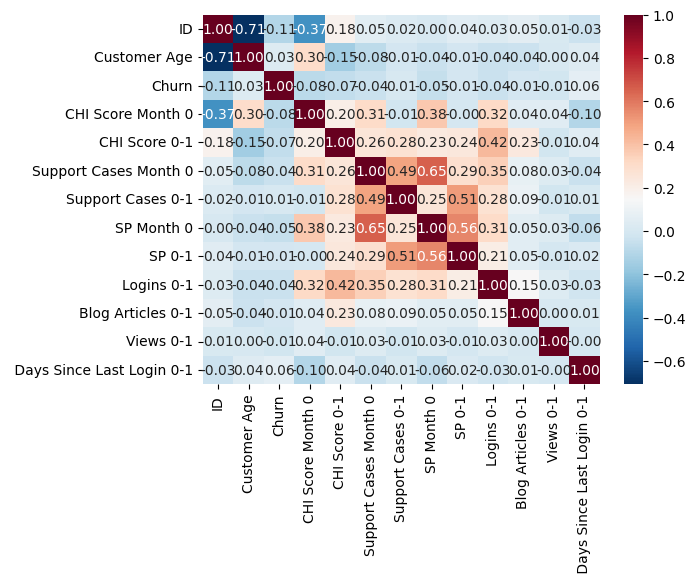

In [27]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');

## Answer 1 -

The jitter plot shows that the number of customers of the age group 0-10 is very high when compared to those of higher age groups. It also seen that the majority of churn is seen among the people of age group 6-14. Therefore, Wall’s belief about the dependence of churn rate on customer age and his belief that the riskiest group is between 6 months – 14 months is correct based on our analysis. However, the correlation coefficient of 0.0302 indicates a very weak positive correlation between customer age and churn. This means that there is a very slight tendency for churn rates to increase with customer age.

<Axes: xlabel='Churn', ylabel='Customer Age'>

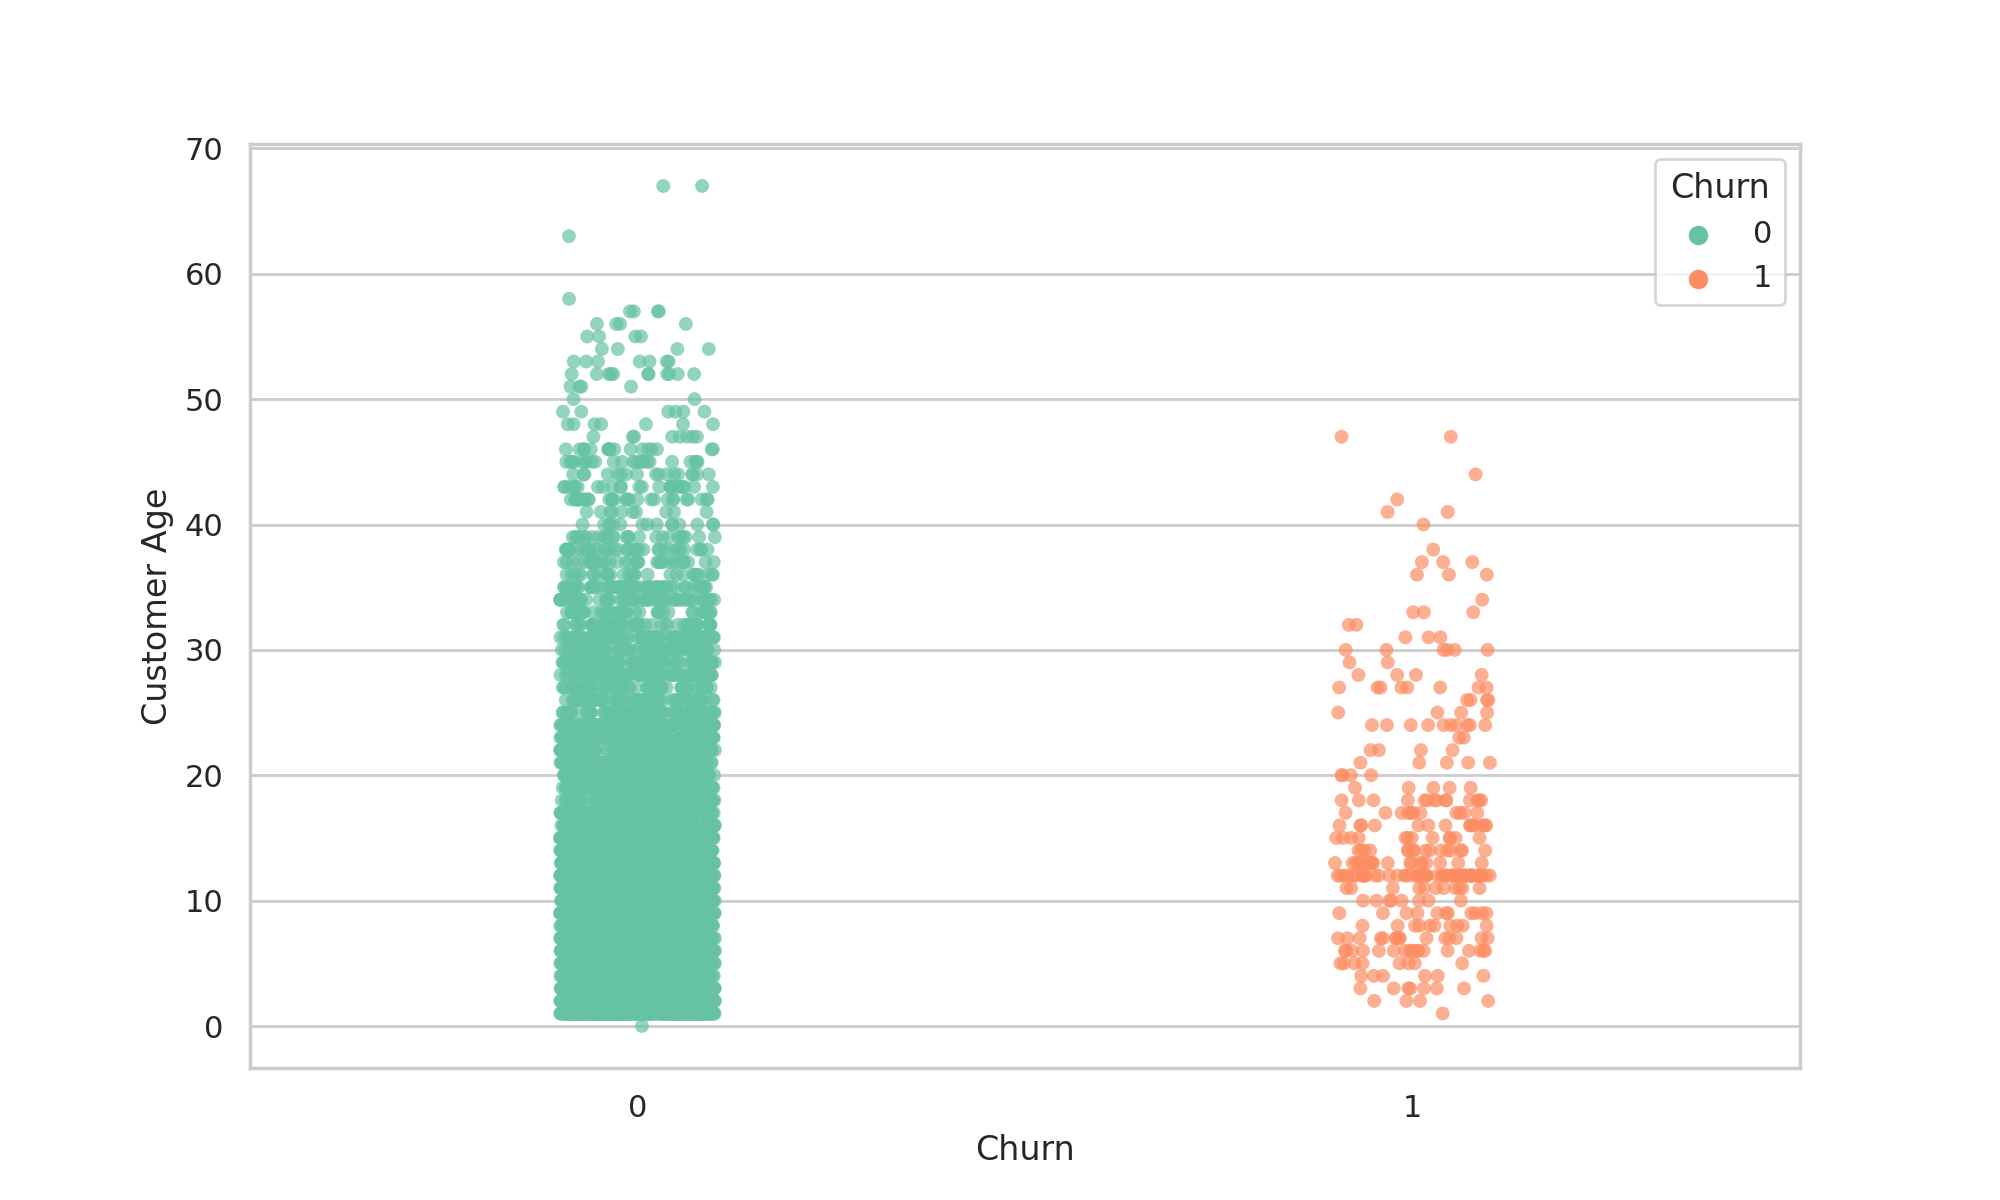

In [99]:
#Creating a jitterplot to see the highest churn in which customer age.
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.stripplot(x='Churn', y='Customer Age', data=df, jitter=True, alpha=0.7, palette="Set2", hue='Churn')

## Answer 2

In terms of balanced accuracy alone, a higher value is generally better. In your case:
-	Logistic Regression Model: Balanced Accuracy 0.5000
-	Decision Tree Classifier Model: Balanced Accuracy 0.5175

The Decision Tree Classifier has a slightly higher balanced accuracy, suggesting that, based on this metric alone, it performs slightly better than the Logistic Regression model on the given test data.
However, it's essential to note that balanced accuracy is just one metric, and it might not provide a complete picture of model performance.


In [105]:
X = df.drop(['ID', 'Churn'], axis=1)
y = df['Churn'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy:', format(balanced_accuracy, '.4f'))

Balanced Accuracy: 0.5000


In [106]:
# Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy:', format(balanced_accuracy, '.4f'))

Balanced Accuracy: 0.5175


In [32]:
probabilities_class_1 = logreg.predict_proba(X_test)[:, 1]

print('The probabilities for Customer getting Churned:', probabilities_class_1)

The probabilities for Customer getting Churned: [0.00822172 0.01691891 0.05981505 ... 0.06041832 0.03315093 0.01103408]


## Answer 2.i and 2.ii

In [33]:
customer_672_data = df[df['ID'] == 672]

X_customer_672 = customer_672_data.drop(['ID', 'Churn'], axis=1)

# Use the trained logistic regression model to predict the probability
predicted_prob = logreg.predict_proba(X_customer_672)[:, 1]

# Set a threshold for interpretation
threshold = 0.5

# Interpret the prediction
prediction = "Churned" if predicted_prob > threshold else "Not Churned"

#Actual status of churn
customer_672_actual_status = df[df['ID'] == 672]['Churn'].iloc[0]

# Print the results
print(f"Predicted Probability of Churn for Customer 672: {predicted_prob[0]:.4f}")
print(f"Prediction: {prediction}")
print('Actual Churn Status for Customer 672:', customer_672_actual_status)

Predicted Probability of Churn for Customer 672: 0.0342
Prediction: Not Churned
Actual Churn Status for Customer 672: 0


In [34]:
customer_354_data = df[df['ID'] == 354]

X_customer_354 = customer_354_data.drop(['ID', 'Churn'], axis=1)

# Use the trained logistic regression model to predict the probability
predicted_prob = logreg.predict_proba(X_customer_354)[:, 1]

# Set a threshold for interpretation
threshold = 0.5

# Interpret the prediction
prediction = "Churned" if predicted_prob > threshold else "Not Churned"

# Predict the probability of churn
probability_churn_customer_354 = logreg.predict_proba(X_customer_354)[:, 1]

#Actual status of churn
customer_354_actual_status = df[df['ID'] == 354]['Churn'].iloc[0]

# Print the results
print(f"Predicted Probability of Churn for Customer 354: {predicted_prob[0]:.4f}")
print(f"Prediction: {prediction}")
print('Actual Churn Status for Customer 354:', customer_354_actual_status)

Predicted Probability of Churn for Customer 354: 0.0439
Prediction: Not Churned
Actual Churn Status for Customer 354: 0


In [35]:
customer_5203_data = df[df['ID'] == 5203]

X_customer_5203 = customer_5203_data.drop(['ID', 'Churn'], axis=1)

# Use the trained logistic regression model to predict the probability
predicted_prob = logreg.predict_proba(X_customer_5203)[:, 1]

# Set a threshold for interpretation
threshold = 0.5

# Interpret the prediction
prediction = "Churned" if predicted_prob > threshold else "Not Churned"

# Predict the probability of churn
probability_churn_customer_5203 = logreg.predict_proba(X_customer_5203)[:, 1]

#Actual status of churn
customer_5203_actual_status = df[df['ID'] == 5203]['Churn'].iloc[0]

# Print the results
print(f"Predicted Probability of Churn for Customer 5203: {predicted_prob[0]:.4f}")
print(f"Prediction: {prediction}")
print('Actual Churn Status for Customer 5203:', customer_354_actual_status)

Predicted Probability of Churn for Customer 5203: 0.0430
Prediction: Not Churned
Actual Churn Status for Customer 5203: 0


## Answer 3 -

The predicted probabilities of customers leaving are influenced by the coefficients associated with each feature in the Lasso Regression model. Lasso regression is chosen for predicting customer churn due to its ability to handle feature selection and sparsity. By encouraging sparse coefficients, Lasso inherently performs feature selection, making the model more interpretable. It effectively deals with multicollinearity by selecting one variable from correlated groups, preventing redundancy in the model. The automatic regularization provided by Lasso aids in preventing overfitting, making the model more robust and generalizable to unseen data. Moreover, Lasso's capability to shrink coefficients to zero is advantageous for handling irrelevant features, ensuring that only the most impactful variables contribute to the predictive performance.

The top factors contributing the most to the predicted probabilities that these customers will leave are the following –
-	Support Cases 0-1
-	Support Cases month 0
-	Days since last login 0-1
-	Customer Age
-	CHI Score 0-1
-	CHI Score month 0


In [36]:
# Fit Ridge Regression model
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
ridge.fit(X_train, y_train)

coef = ridge.coef_

important_features = X.columns

# Create a DataFrame to store features and their coefficients
feature_coef_df = pd.DataFrame({'Feature': important_features, 'Coefficient': coef})

# Sort the DataFrame by absolute coefficient values for better visibility
feature_coef_df = feature_coef_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted DataFrame
print(feature_coef_df)

                       Feature   Coefficient
4            Support Cases 0-1  2.940638e-03
10   Days Since Last Login 0-1  1.103305e-03
0                 Customer Age  8.250921e-04
5                   SP Month 0  2.333600e-04
6                       SP 0-1  1.754088e-04
8            Blog Articles 0-1  1.313652e-04
7                   Logins 0-1  4.597068e-06
9                    Views 0-1 -6.451399e-07
1            CHI Score Month 0 -2.822220e-04
2                CHI Score 0-1 -3.924971e-04
3        Support Cases Month 0 -1.048177e-03


Text(0.5, 1.0, 'Feature Importance from Ridge Regression')

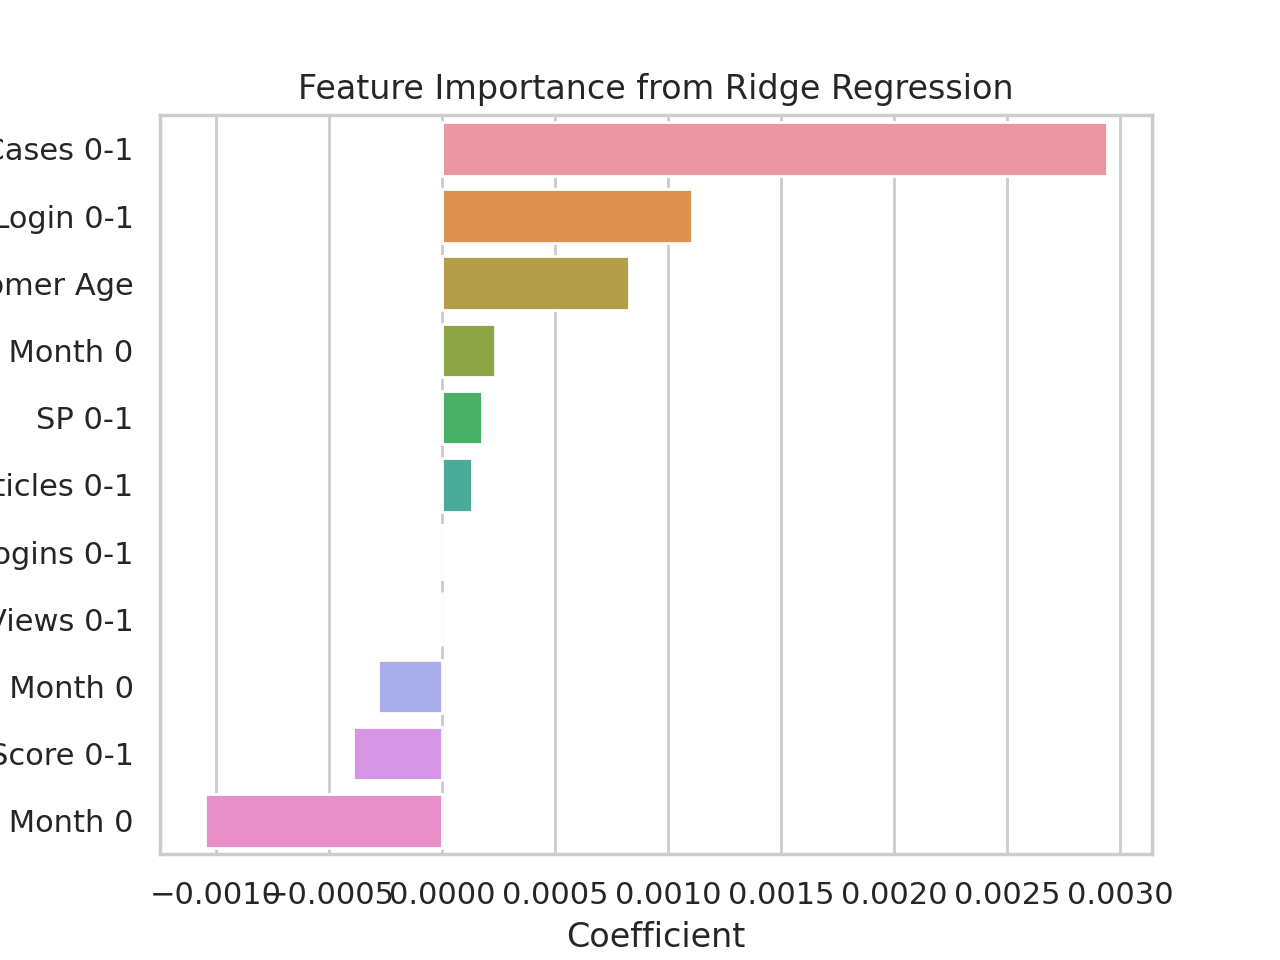

In [108]:
sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df)
plt.title('Feature Importance from Ridge Regression')

## Answer 4

I selected the top 100 customers based using our Logistic Regression model with the highest churn probabilities. This ensures that the focus is on the customers most likely to churn, maximizing the potential impact of targeted interventions.

For finding the top 3 features I calculated the correlation between each feature and the churn label for each customer. Correlation provides a more direct measure of the strength and direction of the relationship between a feature and churn, taking into account the specific values of each feature for that customer.

Moreover, the top three features based on their correlation to churn, ensures that the focus is on the most influential factors driving churn for each customer. This approach provides more actionable insights for targeted interventions.

In [74]:
top_100_customers_df = df.copy()

top_100_customers_df['Churned_probabilities'] = logreg.predict_proba(X)[:, 1]
top_100_customers_df = top_100_customers_df.sort_values(by='Churned_probabilities', ascending=False)

top_100_customers_result_df = top_100_customers_df.head(100).copy()
display(top_100_customers_result_df.head())

,ID,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,Churned_probabilities
2286,2287,34,0,227,7,5,5,2.800000,2.800000,11,-4,-27768,0,0.369724
356,357,12,1,203,25,7,6,2.857143,-0.142857,88,-2,-28322,3,0.316627
108,109,40,0,0,-125,0,0,0.000000,0.000000,-8,0,-216,6,0.299549
1970,1971,30,0,0,-113,0,0,0.000000,0.000000,-23,0,69,7,0.254593
1671,1672,17,1,2,1,0,0,0.000000,0.000000,0,0,0,61,0.248428


In [89]:
# Exclude 'ID' column from correlation calculation
correlations = top_100_customers_result_df.drop(['ID', 'Churned_probabilities'], axis=1).corr()

# Select the top three features with the highest correlation to churn
top_three_features = correlations['Churn'].sort_values(ascending=False)[1:4].index.tolist()

# Create an empty list to store the results
result_data = []

# Calculate top three drivers of churn for each customer
for i in range(top_100_customers_result_df.shape[0]):
    customer_features = top_100_customers_result_df.iloc[i][top_three_features]
    customer_features = customer_features.sort_values(ascending=False)

    result_data.append({
        'Customer ID': top_100_customers_result_df.iloc[i]['ID'],
        'Top Feature 1': customer_features.index[0],
        'Top Feature 2': customer_features.index[1],
        'Top Feature 3': customer_features.index[2]
    })

# Create a DataFrame from the list
top_3_features_df = pd.DataFrame(result_data)

# Print the result DataFrame
print(top_3_features_df)


    Customer ID          Top Feature 1          Top Feature 2  \
0        2287.0      CHI Score Month 0  Support Cases Month 0   
1         357.0      CHI Score Month 0  Support Cases Month 0   
2         109.0  Support Cases Month 0      Support Cases 0-1   
3        1971.0  Support Cases Month 0      Support Cases 0-1   
4        1672.0      CHI Score Month 0  Support Cases Month 0   
..          ...                    ...                    ...   
95       1069.0  Support Cases Month 0      Support Cases 0-1   
96       2047.0  Support Cases Month 0      Support Cases 0-1   
97       1953.0  Support Cases Month 0      Support Cases 0-1   
98        104.0  Support Cases Month 0      Support Cases 0-1   
99       2744.0  Support Cases Month 0      Support Cases 0-1   

        Top Feature 3  
0   Support Cases 0-1  
1   Support Cases 0-1  
2   CHI Score Month 0  
3   CHI Score Month 0  
4   Support Cases 0-1  
..                ...  
95  CHI Score Month 0  
96  CHI Score Month 0  
97 

In [107]:
# Merge the two dataframes based on the 'ID' column
master_df = pd.merge(top_100_customers_result_df, top_3_features_df, left_on='ID', right_on='Customer ID')

master_df.drop(['Customer ID'], axis=1, inplace=True)

# Display the master dataframe
display(master_df.head())


,ID,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,Churned_probabilities,Top Feature 1,Top Feature 2,Top Feature 3
0,2287,34,0,227,7,5,5,2.800000,2.800000,11,-4,-27768,0,0.369724,CHI Score Month 0,Support Cases Month 0,Support Cases 0-1
1,357,12,1,203,25,7,6,2.857143,-0.142857,88,-2,-28322,3,0.316627,CHI Score Month 0,Support Cases Month 0,Support Cases 0-1
2,109,40,0,0,-125,0,0,0.000000,0.000000,-8,0,-216,6,0.299549,Support Cases Month 0,Support Cases 0-1,CHI Score Month 0
3,1971,30,0,0,-113,0,0,0.000000,0.000000,-23,0,69,7,0.254593,Support Cases Month 0,Support Cases 0-1,CHI Score Month 0
4,1672,17,1,2,1,0,0,0.000000,0.000000,0,0,0,61,0.248428,CHI Score Month 0,Support Cases Month 0,Support Cases 0-1


In [94]:
drive.mount('/content/drive')
master_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BA815/hw3.xlsx', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
